<a href="https://colab.research.google.com/github/HamzahSarmad/Y3_CO3093_Big_Data_And_Predictive_Analytics/blob/main/Week2LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1 Preparing and Describing the Data

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
baseUrl = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series'
confirmed = baseUrl + '/time_series_covid19_confirmed_global.csv'
deaths = baseUrl + '/time_series_covid19_deaths_global.csv'
recovered = baseUrl + '/time_series_covid19_recovered_global.csv'

In [3]:
# Reading all of the input files
confi = pd.read_csv(confirmed)
death = pd.read_csv(deaths)
rec = pd.read_csv(recovered)

# Question 2 Data Handling and Visualisation

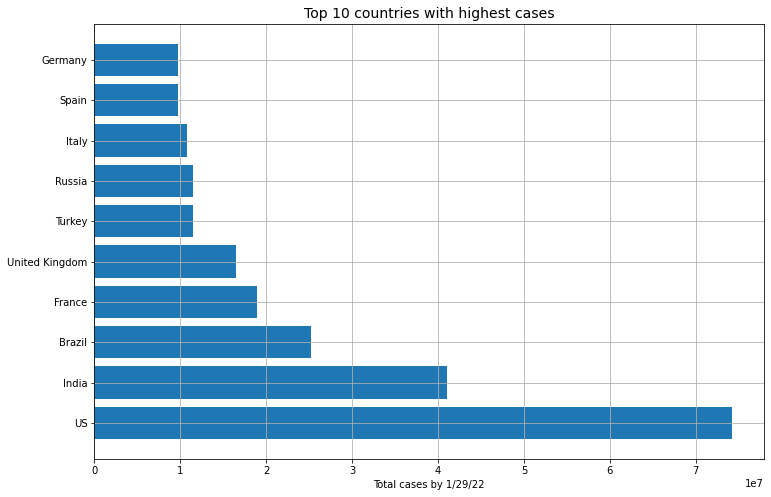

In [4]:
grouped_conf = confi.groupby(by='Country/Region').sum()
sorted_grouped_conf = grouped_conf.sort_values(by=grouped_conf.columns[-1], ascending=False)
last_col = confi.iloc[-1]
last_day = last_col.index[-1]
plt.figure(figsize=(12, 8))
plt.title('Top 10 countries with highest cases', fontsize=14)
plt.barh(sorted_grouped_conf[last_day].index[:10], \
         sorted_grouped_conf[last_day].head(10))
plt.xlabel('Total cases by '+last_day)
plt.grid()
plt.show()

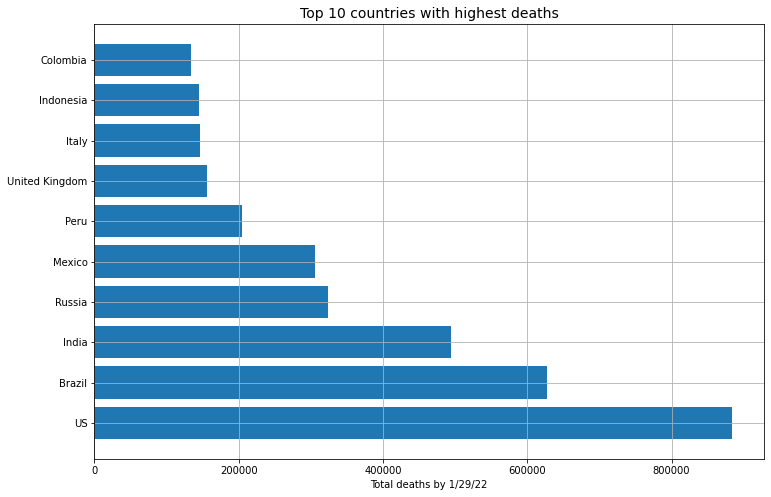

In [5]:
grouped_deaths = death.groupby(by='Country/Region').sum()
sorted_grouped_deaths = grouped_deaths.sort_values(by=grouped_deaths.columns[-1], ascending=False)
last_col = confi.iloc[-1]
last_day = last_col.index[-1]
plt.figure(figsize=(12, 8))
plt.title('Top 10 countries with highest deaths', fontsize=14)
plt.barh(sorted_grouped_deaths[last_day].index[:10], \
         sorted_grouped_deaths[last_day].head(10))
plt.xlabel('Total deaths by '+last_day)
plt.grid()
plt.show()

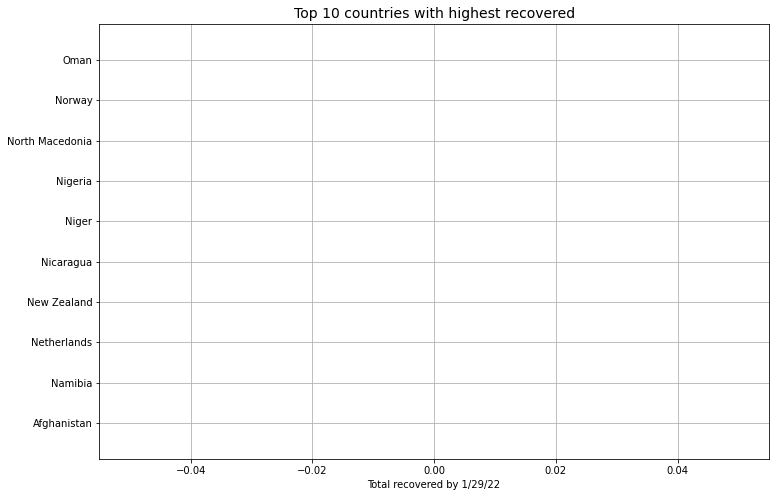

In [6]:
grouped_rec = rec.groupby(by='Country/Region').sum()
sorted_grouped_rec = grouped_rec.sort_values(by=grouped_rec.columns[-1], ascending=False)
last_col = confi.iloc[-1]
last_day = last_col.index[-1]
plt.figure(figsize=(12, 8))
plt.title('Top 10 countries with highest recovered', fontsize=14)
plt.barh(sorted_grouped_rec[last_day].index[:10], \
         sorted_grouped_rec[last_day].head(10))
plt.xlabel('Total recovered by '+last_day)
plt.grid()
plt.show()

Data set shows no records since december of 2021, hence the graphs shows 0 for all countries

# Question 3

In [7]:
def get_total_confirmed_world():
 total = confi.iloc[:, 4: ].apply(sum, axis=0)
 total.index = pd.to_datetime(total.index)
 return total

In [13]:
#Question 2a
def get_total_confirmed_ofcountry(country):
  df_country = confi['Country/Region']==country
  total = confi[df_country].iloc[:,4:].apply(sum, axis=0)
  total.index = pd.to_datetime(total.index)
  return total

#get_total_confirmed_ofcountry('United Kingdom')

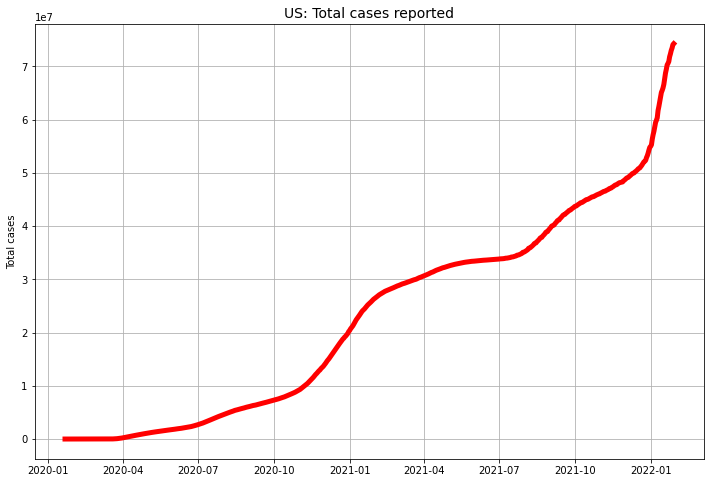

In [16]:
def line_plot_ofcountry(name, col):
  data = get_total_confirmed_ofcountry(name)
  plt.figure(figsize=(12, 8))
  plt.title(name.upper()+': Total cases reported', fontsize=14)
  plt.plot(data.index, data, color=col, lw=5)
  plt.ylabel('Total cases')
  plt.grid()
  plt.show()
line_plot_ofcountry("US", "red")

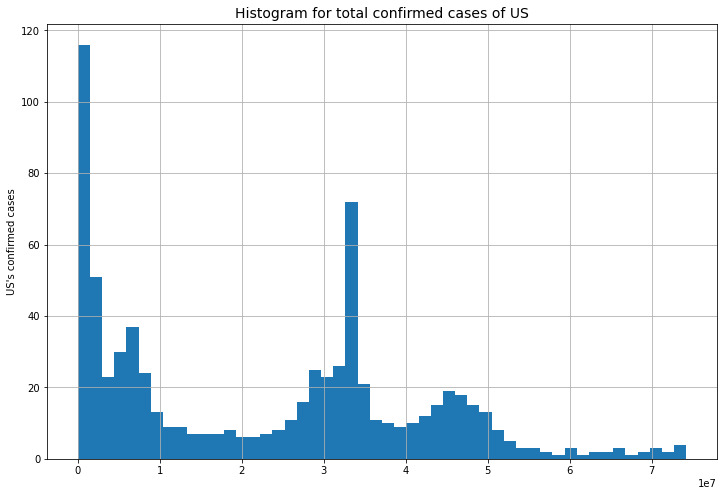

In [14]:
#Question 2b
def hist_total_confirmed_ofcountry(country):
  data = get_total_confirmed_ofcountry(country)
  plt.figure(figsize=(12, 8))
  plt.title('Histogram for total confirmed cases of '+country, fontsize=14)
  plt.hist(data, bins=50)
  plt.ylabel("%s's confirmed cases" % country)
  plt.grid()
  plt.show()
hist_total_confirmed_ofcountry('US')

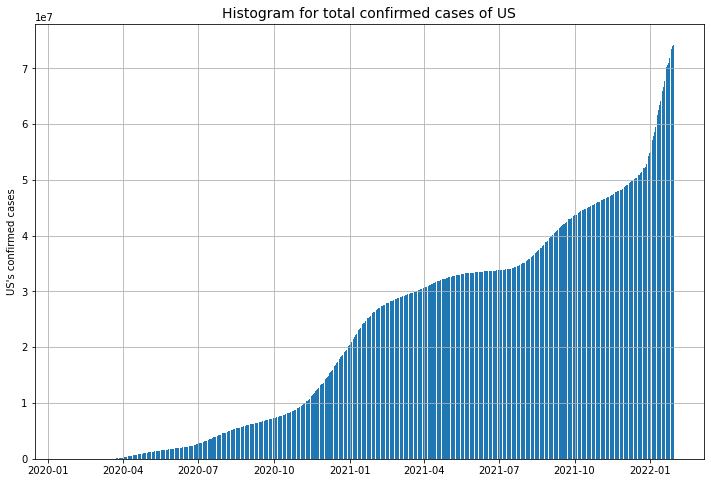

In [18]:
def bar_total_confirmed_ofcountry(country):
  data = get_total_confirmed_ofcountry(country)
  plt.figure(figsize=(12, 8))
  plt.title('Histogram for total confirmed cases of '+country, fontsize=14)
  plt.bar(data.index, data)
  plt.ylabel("%s's confirmed cases" % country)
  plt.grid()
  plt.show()
bar_total_confirmed_ofcountry('US')

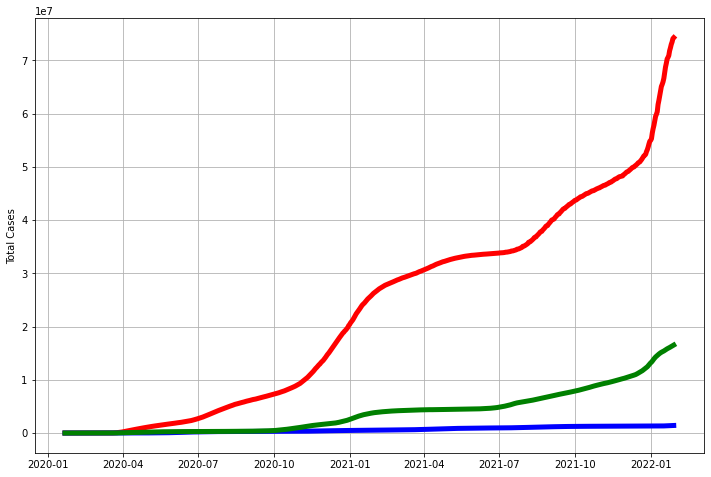

In [19]:
def line_plot_ofcountries(names, cols):
  plt.figure(figsize=(12,8))
  for i in range(len(names)):
    data = get_total_confirmed_ofcountry(names[i])
    plt.plot(data.index, data, color=cols[i], lw=5)
  plt.ylabel("Total Cases")
  plt.grid()
  plt.show()
names=['US','Pakistan','United Kingdom']
cols=['red','blue','green']
line_plot_ofcountries(names, cols)

# Question 4

In [20]:
def get_daily_confirmed_country(name):
    df_country = confi['Country/Region']==name
    cases = confi[df_country].iloc[:, 4: ].apply(lambda x: x.sum())
    dates = pd.to_datetime(cases.index)
    frame = {'Dates':dates, 'Cases':cases}
    df = pd.DataFrame(frame)
    df['Lag'] = df.Cases.shift(1).fillna(0)
    df['Daily Cases'] = df.Cases - df.Lag
    return df[['Dates', 'Daily Cases']]

def moving_averages (country, wn=7):
    df = get_daily_confirmed_country(country)
    df['SMA_1'] = df['Daily Cases'].rolling(window=wn).mean()
    a = np.zeros(df.shape[0])
    for i in range(0, df.shape[0]-6):
        a[i+6] = df['Daily Cases'][i:i+wn].mean()
    df['SMA_2'] = np.array(a)
    return df

    
def plot_daily_and_avg_country(name):
    df = get_daily_confirmed_country(name)
    df['SMA_1'] = df['Daily Cases'].rolling(window=7).mean()
    plt.figure(figsize=(12,8))
    ax = df['SMA_1'].fillna(0).plot.line(color='red', lw=3)
    df['Daily Cases'].plot.bar(ax=ax, color='blue')
    ax.set_title(name.upper()+': Daily cases reported', fontsize=14)
    ax.set_ylabel('Daily cases')
    x = 0
    for xlabel in ax.xaxis.get_ticklabels():
        if x % 20 != 0:
            xlabel.set_visible(False)
        x = x+1
    #plt.grid()
    plt.show()

In [22]:
data = get_daily_confirmed_country('United Kingdom')
data.tail(2)

,Dates,Daily Cases
1/28/22,2022-01-28,89316.0
1/29/22,2022-01-29,72405.0


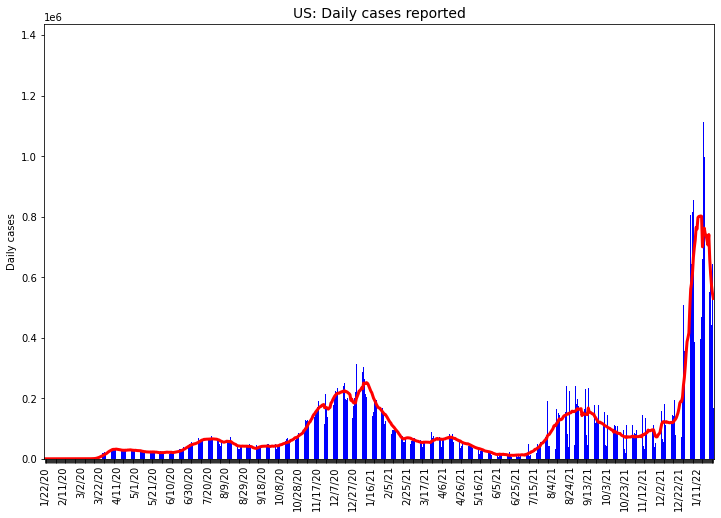

In [23]:
plot_daily_and_avg_country('US')

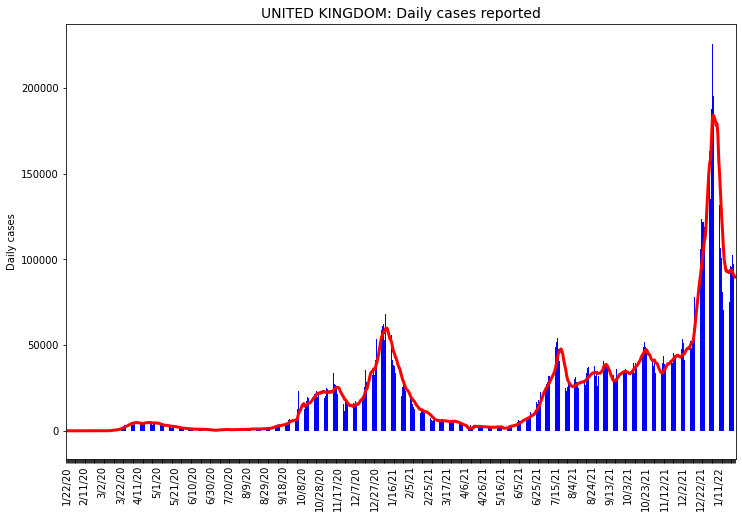

In [24]:
plot_daily_and_avg_country('United Kingdom')

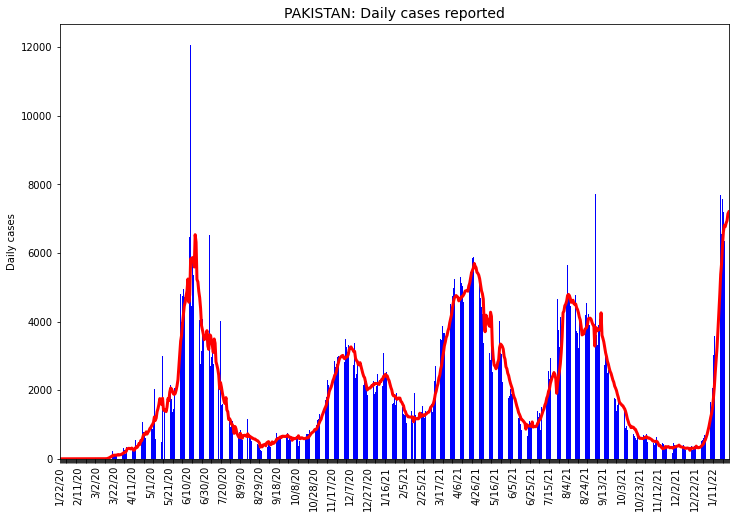

In [25]:
plot_daily_and_avg_country('Pakistan')

# Question 5

In [26]:
def model0(x, p0, p1):
    y = p0+p1*np.power(x,1)
    return y

def model1(x, p1, p2, p3, p4):
    y = p1*np.power(x, 2)+p2*np.power(x,3)+p3*np.power(x,4)+p4*np.power(x,5)
    return y

def model2(x, p1, p2, p3):
    y = p1*np.power(x,1)+p2*np.exp(p3*x)
    return y

def model_cases_ofcountry(name):
    df = get_total_confirmed_ofcountry(name)
    df = df.reset_index(drop = True)
    pars1, cov1 = curve_fit(f=model1, xdata=df.index, ydata=df, p0=[0, 0, 0, 0], bounds=(-np.inf, np.inf))
    pars0, cov0 = curve_fit(f=model0, xdata=df.index, ydata=df, p0=[0, 0], bounds=(-np.inf, np.inf))
    stdevs = np.sqrt(np.diag(cov1))
    pred1 = model1(df.index, *pars1)
    pred0 = model0(df.index, *pars0)
    plt.figure(figsize=(12, 8))
    plt.title(name.upper()+': Total cases reported', fontsize=14)
    g1, = plt.plot(df.index, df, 'o', lw=3, label = 'actual')
    g3, = plt.plot(df.index, pred1, color='red', lw=4, label = 'predicted')
    plt.legend(handles=[g1, g3], loc='upper center')
    plt.grid()
    plt.show()
    return stdevs

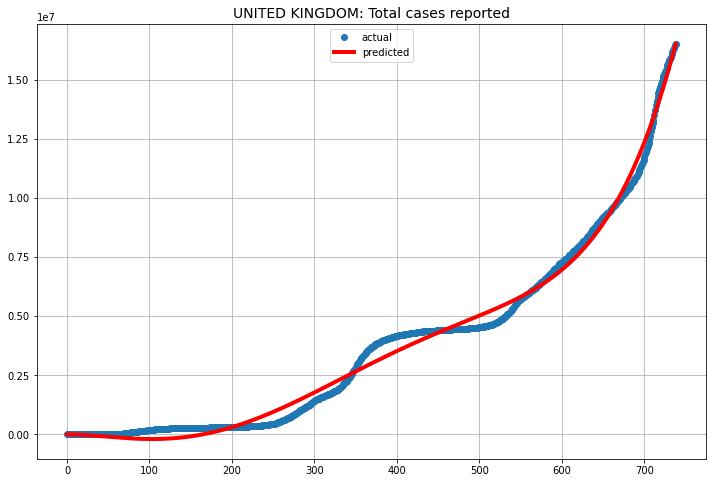

array([3.11921350e+00, 1.92764046e-02, 3.83666261e-05, 2.46151698e-08])

In [29]:
model_cases_ofcountry('United Kingdom')